In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sklearn.datasets import make_blobs

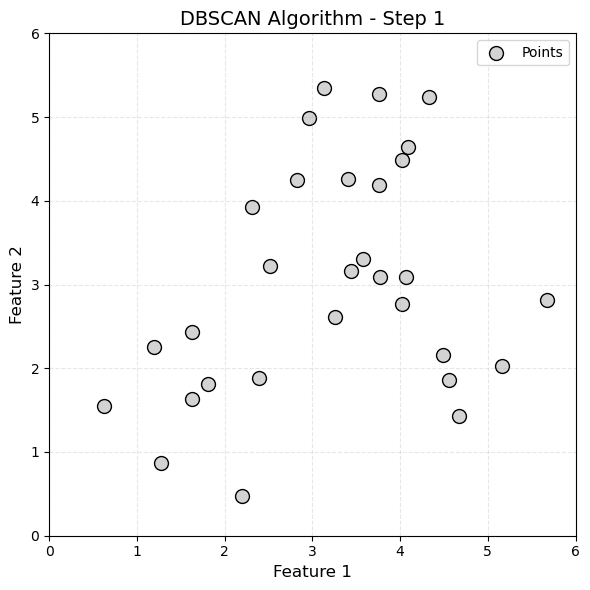

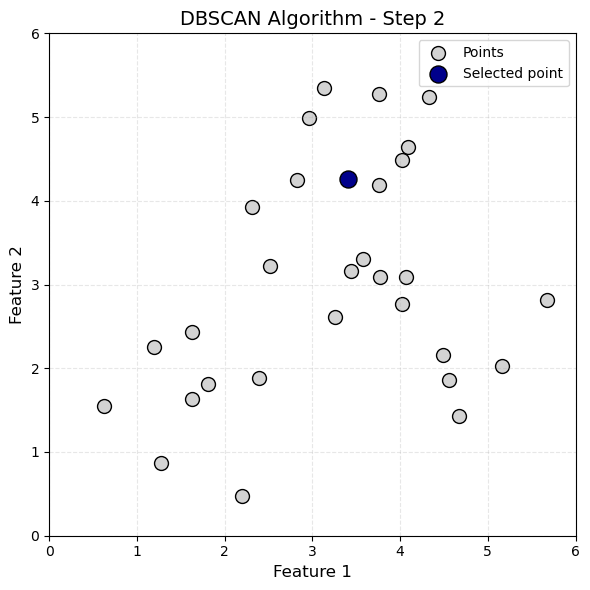

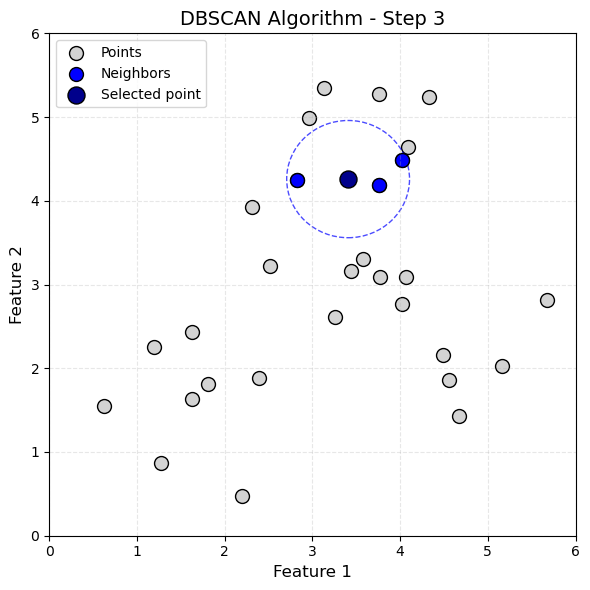

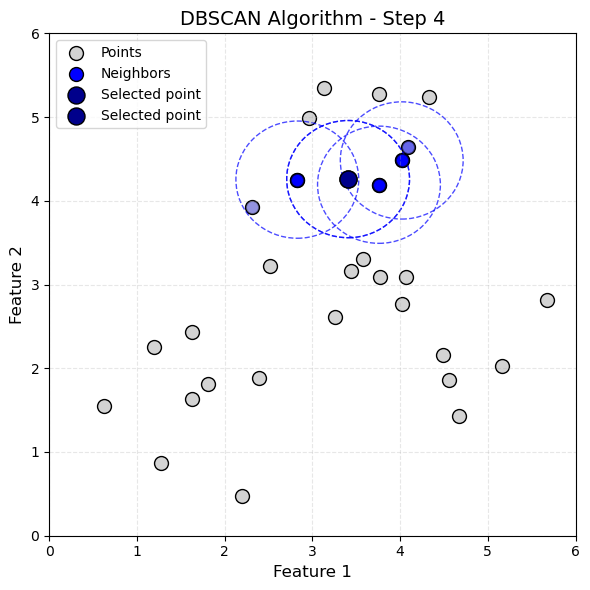

In [16]:
# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate a cloud of 30 points
X, _ = make_blobs(n_samples=30, centers=[(2, 2), (4.5, 3), (3.5, 4.5)], cluster_std=0.8, random_state=42)

# Parameters
eps = 0.7  # radius for neighborhood
min_samples = 3  # minimum points to form a cluster

def plot_step(step, core_point_idx=None, neighbors=None, expanded_neighbors=None):
    plt.figure(figsize=(6, 6))

    # Plot all points
    plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=100, edgecolors='black', label='Points')

    if step == 2 and core_point_idx is not None:
        # Highlight the core point
        plt.scatter(X[core_point_idx, 0], X[core_point_idx, 1], c='darkblue', s=150,
                    edgecolors='black', label='Selected point')

    if step >= 3 and neighbors is not None:
        # Draw circle around core point
        circle = Circle((X[core_point_idx, 0], X[core_point_idx, 1]), eps,
                        fill=False, color='blue', linestyle='--', alpha=0.7)
        plt.gca().add_patch(circle)

        # Highlight neighbors
        plt.scatter(X[neighbors, 0], X[neighbors, 1], c='blue', s=100,
                    edgecolors='black', label='Neighbors')

        # Highlight the core point
        plt.scatter(X[core_point_idx, 0], X[core_point_idx, 1], c='darkblue', s=150,
                    edgecolors='black', label='Selected point')

    if step >= 4 and expanded_neighbors is not None:
        # Draw circles around all neighbors and show their neighborhoods
        for neighbor in neighbors:
            # Find points in epsilon neighborhood of this neighbor
            distances = np.linalg.norm(X - X[neighbor], axis=1)
            neighbor_neighbors = np.where(distances <= eps)[0]

            # Check if it's a core point (has enough neighbors)
            if len(neighbor_neighbors) >= min_samples:
                color = 'blue'
                alpha = 0.3
            else:
                color = 'lightblue'
                alpha = 0.2

            # Draw circle
            circle = Circle((X[neighbor, 0], X[neighbor, 1]), eps,
                           fill=False, color=color, linestyle='--', alpha=0.7)
            plt.gca().add_patch(circle)

            # Highlight points in this neighborhood
            plt.scatter(X[neighbor_neighbors, 0], X[neighbor_neighbors, 1],
                        c=color, s=80, alpha=alpha, edgecolors='black')

        # Highlight the core point
        plt.scatter(X[core_point_idx, 0], X[core_point_idx, 1], c='darkblue', s=150,
                    edgecolors='black', label='Selected point')

    plt.title(f"DBSCAN Algorithm - Step {step}", fontsize=14)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.xlim(0, 6)
    plt.ylim(0, 6)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"dbscan_step_{step}.png", dpi=300)
    plt.show()

# Step 1: Just show the point cloud
plot_step(1)

# Step 2: Select a core point (we'll choose one that will demonstrate the algorithm well)
# Let's find a point that has at least min_samples in its neighborhood
core_point_idx = None
for i in range(len(X)):
    distances = np.linalg.norm(X - X[i], axis=1)
    if np.sum(distances <= eps) >= min_samples:
        core_point_idx = i
        break

plot_step(2, core_point_idx)

# Step 3: Show epsilon neighborhood of core point
distances = np.linalg.norm(X - X[core_point_idx], axis=1)
neighbors = np.where(distances <= eps)[0]

plot_step(3, core_point_idx, neighbors)

# Step 4: Show neighborhoods of all neighbors
plot_step(4, core_point_idx, neighbors, neighbors)